# Data Cleaning and EDA

This notebook will be used to clean and explore the data.

---

In [157]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

# Set seed
np.random.seed(42)
random.seed(42)

# make notebook to show all display without suppressed it
pd.options.display.max_rows = 4000

In [14]:
# read an example club stats data

df_1 = pd.read_csv('../data/premier_league_by_table/club_stats_2023-2024_table_0.csv')

df_1.head(3)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,38,28,7,3,96,34,62,91,2.39,80.5,35.6,44.9,1.18,53012,Erling Haaland - 27,Ederson,→ Champions League via league finish
1,2,Arsenal,38,28,5,5,91,29,62,89,2.34,76.1,27.9,48.2,1.27,60236,Bukayo Saka - 16,David Raya,→ Champions League via league finish
2,3,Liverpool,38,24,10,4,86,41,45,82,2.16,87.8,45.7,42.0,1.11,55979,Mohamed Salah - 18,Alisson,→ Champions League via league finish


In [15]:
df_2 = pd.read_csv('../data/premier_league_by_table/club_stats_2023-2024_table_1.csv')

df_2.head(3)

,Unnamed: 0_level_0,Unnamed: 1_level_0,Home,Home.1,Home.2,Home.3,Home.4,Home.5,Home.6,Home.7,...,Away.3,Away.4,Away.5,Away.6,Away.7,Away.8,Away.9,Away.10,Away.11,Away.12
0,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90
1,1,Manchester City,19,14,5,0,51,16,35,47,...,3,45,18,27,44,2.32,39.8,21.6,18.2,0.96
2,2,Arsenal,19,15,2,2,48,16,32,47,...,3,43,13,30,42,2.21,32.6,14.5,18.2,0.96


### Club stats data cleaning

In [17]:
# Define input and output directories
input_dir = "../data/premier_league_by_table"
output_dir = "../data/premier_league_by_table/new_header"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all CSV files in the input directory
for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_dir, file_name)
        
        # Check if the file is `_0.csv`
        if file_name.endswith("_0.csv"):
            print(f"Skipping processing for: {file_name}, but saving it to new folder.")
            # Read the file as-is and save it to the new folder
            df = pd.read_csv(file_path)
            output_file_path = os.path.join(output_dir, file_name)
            df.to_csv(output_file_path, index=False)
            continue
        
        # Process all other files with multi-level headers
        df = pd.read_csv(file_path, header=[0, 1])  # Reads the top two rows as headers
        
        # Combine the headers for all columns except unnamed
        df.columns = [
            f"{col[0]}-{col[1]}" if "Unnamed" not in col[0] else col[1]
            for col in df.columns
        ]
        
        # Save the updated DataFrame to a new file in the output directory
        output_file_path = os.path.join(output_dir, file_name)
        df.to_csv(output_file_path, index=False)
        print(f"Processed and saved: {file_name}")

Skipping processing for: club_stats_2023-2024_table_0.csv, but saving it to new folder.
Processed and saved: club_stats_2023-2024_table_1.csv
Processed and saved: club_stats_2023-2024_table_3.csv
Processed and saved: club_stats_2023-2024_table_2.csv
Processed and saved: club_stats_2023-2024_table_6.csv
Processed and saved: club_stats_2023-2024_table_7.csv
Processed and saved: club_stats_2023-2024_table_5.csv
Processed and saved: club_stats_2023-2024_table_4.csv
Processed and saved: club_stats_2023-2024_table_17.csv
Processed and saved: club_stats_2023-2024_table_16.csv
Processed and saved: club_stats_2023-2024_table_14.csv
Processed and saved: club_stats_2023-2024_table_15.csv
Processed and saved: club_stats_2023-2024_table_11.csv
Processed and saved: club_stats_2023-2024_table_10.csv
Processed and saved: club_stats_2023-2024_table_12.csv
Processed and saved: club_stats_2023-2024_table_13.csv
Processed and saved: club_stats_2023-2024_table_22.csv
Processed and saved: club_stats_2023-20

In [18]:
# Directories for input and output files
input_dir = "../data/premier_league_by_table/new_header"
output_dir = "../data/premier_league_by_table/combined"
os.makedirs(output_dir, exist_ok=True)

# Define the years for processing
years = ["2023-2024"]

# Loop through each year
for year in years:
    year_files = [f for f in os.listdir(input_dir) if f.endswith(".csv") and year in f]
    dfs = []  # To store DataFrames for the year
    
    for file_name in year_files:
        file_path = os.path.join(input_dir, file_name)
        
        try:
            df = pd.read_csv(file_path)
            
            # Filter out rows where 'Squad' contains "vs"
            if "Squad" in df.columns:
                df = df[~df["Squad"].str.contains("vs", case=False, na=False)]
                dfs.append(df)
            else:
                print(f"'Squad' column not found in {file_name}. Skipping.")
        
        except Exception as e:
            print(f"Error reading {file_name}: {e}")
    
    # Merge all DataFrames for the year
    if dfs:
        merged_df = dfs[0]
        for df in dfs[1:]:
            merged_df = pd.merge(
                merged_df,
                df,
                on="Squad",
                how="outer",
                suffixes=("", f"_{year}")  # Add year as suffix for overlapping columns
            )
        
        # Remove duplicate columns (if necessary)
        merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
        
        # Save the merged DataFrame for the year
        output_file = os.path.join(output_dir, f"merged_club_stats_{year}.csv")
        merged_df.to_csv(output_file, index=False)
        print(f"Merged data for {year} saved to {output_file}.")
    else:
        print(f"No valid files found for {year}.")

Merged data for 2023-2024 saved to ../data/premier_league_by_table/combined/merged_club_stats_2023-2024.csv.


In [283]:
# read all merged file
club_stats = pd.read_csv('../data/premier_league_by_table/combined/merged_club_stats_2023-2024.csv')

In [284]:
club_stats.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       ...
       'Standard-SoT/90_2023-2024', 'Standard-G/Sh_2023-2024',
       'Standard-G/SoT_2023-2024', 'Standard-Dist_2023-2024',
       'Standard-FK_2023-2024', 'Standard-PK_2023-2024',
       'Standard-PKatt_2023-2024', 'Expected-npxG/Sh_2023-2024',
       'Expected-G-xG_2023-2024', 'Expected-np:G-xG_2023-2024'],
      dtype='object', length=466)

In [285]:
club_stats.shape

(20, 466)

In [286]:
club_stats.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,Standard-SoT/90_2023-2024,Standard-G/Sh_2023-2024,Standard-G/SoT_2023-2024,Standard-Dist_2023-2024,Standard-FK_2023-2024,Standard-PK_2023-2024,Standard-PKatt_2023-2024,Expected-npxG/Sh_2023-2024,Expected-G-xG_2023-2024,Expected-np:G-xG_2023-2024
0,2,Arsenal,38,28,5,5,91,29,62,89,...,5.50,0.12,0.36,15.8,6,10,10,0.11,9.9,7.5
1,4,Aston Villa,38,20,8,10,76,61,15,68,...,4.79,0.13,0.37,16.0,15,4,4,0.12,8.7,7.7
2,12,Bournemouth,38,13,9,16,54,67,-13,48,...,4.61,0.09,0.29,16.7,18,2,3,0.10,-3.9,-3.6
3,16,Brentford,38,10,9,19,56,65,-9,39,...,4.18,0.11,0.32,15.6,17,3,3,0.12,-4.2,-5.0
4,11,Brighton,38,12,12,14,55,62,-7,48,...,5.21,0.08,0.23,16.7,11,5,6,0.10,-6.8,-7.2


In [287]:
club_stats.isnull().sum().sort_values(ascending=False)

Passes-Thr_2023-2024                   20
Penalty Kicks-PKatt                    20
Launched-Cmp_2023-2024                 20
Launched-Att_2023-2024                 20
Launched-Cmp%_2023-2024                20
Passes-Att (GK)_2023-2024              20
SCA Types-TO_2023-2024                 20
Passes-Launch%_2023-2024               20
Passes-AvgLen_2023-2024                20
Goal Kicks-Att_2023-2024               20
Goal Kicks-Launch%_2023-2024           20
Goal Kicks-AvgLen_2023-2024            20
Crosses-Opp_2023-2024                  20
Crosses-Stp_2023-2024                  20
Crosses-Stp%_2023-2024                 20
Sweeper-#OPA_2023-2024                 20
Sweeper-#OPA/90_2023-2024              20
Sweeper-AvgDist_2023-2024              20
Performance-GA                         20
Performance-GA90                       20
Performance-SoTA                       20
Performance-Saves                      20
Performance-Save%                      20
Performance-W                     

In [288]:
# Drop any columns that have null value
club_stats = club_stats.dropna(axis=1, how='any')

In [289]:
club_stats.isnull().sum().sort_values(ascending=False)

Rk                                     0
Pass Types-FK                          0
Long-Cmp%_2023-2024                    0
Ast_2023-2024                          0
xAG_2023-2024                          0
Expected-xA_2023-2024                  0
Expected-A-xAG_2023-2024               0
KP_2023-2024                           0
1/3_2023-2024                          0
PPA_2023-2024                          0
CrsPA_2023-2024                        0
PrgP_2023-2024                         0
Att                                    0
Pass Types-Live                        0
Pass Types-Dead                        0
Pass Types-TB                          0
Long-Cmp_2023-2024                     0
Pass Types-Sw                          0
Pass Types-Crs                         0
Pass Types-TI                          0
Pass Types-CK                          0
Corner Kicks-In                        0
Corner Kicks-Out                       0
Corner Kicks-Str                       0
Outcomes-Cmp    

In [290]:
# Define the columns to keep
columns_to_keep = [
    "Squad", "MP", "W", "D", "L", "GF", "GA", "GD", "Pts", "Pts/MP",
    "Expected-xG_2023-2024", "Expected-npxG_2023-2024", "Expected-xAG_2023-2024", 
    "Expected-npxG+xAG_2023-2024", "Expected-G-xG_2023-2024", "Expected-PSxG", 
    "Expected-PSxG/SoT",
    "Per 90 Minutes-Gls_2023-2024", "Per 90 Minutes-Ast_2023-2024", 
    "Per 90 Minutes-G+A_2023-2024", "Per 90 Minutes-xG_2023-2024", 
    "Per 90 Minutes-xAG_2023-2024", "Per 90 Minutes-npxG_2023-2024",
    "Tackles-Tkl_2023-2024", "Tackles-TklW_2023-2024", "Tackles-Def 3rd_2023-2024", 
    "Tkl+Int_2023-2024", "Blocks-Blocks_2023-2024", "Int_2023-2024",
    "Total-Cmp_2023-2024", "Total-Cmp%_2023-2024", "PrgP_2023-2024", 
    "CrsPA_2023-2024", "PPA_2023-2024",
    "Performance-Saves_2023-2024", "Performance-Save%_2023-2024", 
    "Performance-CS_2023-2024", "Performance-CS%_2023-2024"
]

# Filter the dataset
filtered_clubs_data = club_stats[columns_to_keep]

# Drop rows with null values
filtered_clubs_data = filtered_clubs_data.dropna()

# Save the cleaned dataset
output_path = "../data/premier_league_by_table/combined/filtered_club_stats.csv"
filtered_clubs_data.to_csv(output_path, index=False)

In [291]:
filtered_clubs_data.head(20)

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,...,Int_2023-2024,Total-Cmp_2023-2024,Total-Cmp%_2023-2024,PrgP_2023-2024,CrsPA_2023-2024,PPA_2023-2024,Performance-Saves_2023-2024,Performance-Save%_2023-2024,Performance-CS_2023-2024,Performance-CS%_2023-2024
0,Arsenal,38,28,5,5,91,29,62,89,2.34,...,292,19094,84.6,2106,68,548,54,67.5,18,47.4
1,Aston Villa,38,20,8,10,76,61,15,68,1.79,...,236,16133,83.3,1451,67,363,115,65.3,8,21.1
2,Bournemouth,38,13,9,16,54,67,-13,48,1.26,...,357,11899,74.7,1314,88,352,127,68.6,9,23.7
3,Brentford,38,10,9,19,56,65,-9,39,1.03,...,378,12551,74.6,1283,106,333,119,65.8,7,18.4
4,Brighton,38,12,12,14,55,62,-7,48,1.26,...,288,21810,87.1,1780,81,384,105,66.1,6,15.8
5,Burnley,38,5,9,24,41,78,-37,24,0.63,...,280,13937,77.6,1181,54,216,168,70.5,2,5.3
6,Chelsea,38,18,9,11,77,63,14,63,1.66,...,298,20039,85.8,1615,51,352,125,67.7,8,21.1
7,Crystal Palace,38,13,10,15,57,58,-1,49,1.29,...,323,12915,77.1,1176,60,273,98,64.3,10,26.3
8,Everton,38,13,9,16,40,51,-11,42,1.11,...,358,11349,73.2,1129,77,284,117,73.9,13,34.2
9,Fulham,38,13,8,17,55,61,-6,47,1.24,...,371,16311,80.6,1467,94,355,133,72.1,10,26.3


In [292]:
# Import formation data into the club dataset

# Directories and file paths
input_dir = "../data/player_stats_by_team/" 
club_dataset_path = "../data/premier_league_by_table/combined/filtered_club_stats.csv" 

# Load the club dataset
club_data = pd.read_csv(club_dataset_path)

# Team name mapping between player and club datasets
team_name_mapping = {
    'Aston-Villa': 'Aston Villa',
    'Brighton-Hove-Albion': 'Brighton',
    'Crystal-Palace': 'Crystal Palace',
    'Manchester-City': 'Manchester City',
    'Manchester-United': 'Manchester Utd',
    'Newcastle-United': 'Newcastle Utd',
    'Sheffield-United': 'Sheffield Utd',
    'Tottenham-Hotspur': 'Tottenham',
    'West-Ham-United': 'West Ham',
    'Wolverhampton-Wanderers': 'Wolves',
    'Nott\'ham-Forest': 'Nott\'ham Forest',
    'Luton-Town': 'Luton Town'
}

# Standardize squad names in the club dataset
club_data['Squad'] = club_data['Squad'].replace(team_name_mapping)

# Create a DataFrame to store formation counts for each team
formation_data = []

# Process each team file in the input directory (credit to ChatGPT to create the mapping code)
for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv") and "_table_1_stats_2023-2024.csv" in file_name:
        team_name = file_name.split("_table_1_stats_2023-2024.csv")[0] 
        team_name_standardized = team_name_mapping.get(team_name, team_name)
        file_path = os.path.join(input_dir, file_name)

        # Load the formation data
        try:
            team_data = pd.read_csv(file_path)
            if "Formation" in team_data.columns:
                # Count occurrences of each formation
                formation_counts = team_data["Formation"].value_counts().to_dict()
                
                # Prepare a row with standardized team name and formation counts
                row = {"Squad": team_name_standardized}
                row.update({f"Formation_{formation}": count for formation, count in formation_counts.items()})
                
                # Append to formation data
                formation_data.append(row)
            else:
                print(f"No 'Formation' column found in {file_name}.")
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

# Create a DataFrame from the formation data
formation_df = pd.DataFrame(formation_data)

# Merge the formation data into the club dataset
merged_data = pd.merge(club_data, formation_df, on="Squad", how="left")

# Replace NaN with 0 for formation columns
formation_columns = [col for col in merged_data.columns if col.startswith("Formation_")]
merged_data[formation_columns] = merged_data[formation_columns].fillna(0)

# Save the updated dataset back to the same file
merged_data.to_csv(club_dataset_path, index=False)
print(f"Club dataset with formations saved to {club_dataset_path}")

Club dataset with formations saved to ../data/premier_league_by_table/combined/filtered_club_stats.csv


In [293]:
filtered_clubs_data = pd.read_csv('../data/premier_league_by_table/combined/filtered_club_stats.csv')

In [294]:
# Since all the teams are using different formation, I will replace 0 to all null value on the formation columns
filtered_clubs_data.fillna(0, inplace=True)

In [295]:
filtered_clubs_data.head()

,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,...,Formation_4-2-2-2,Formation_4-2-4-0,Formation_4-1-2-1-2◆,Formation_4-3-1-2,Formation_3-4-1-2,Formation_4-1-3-2,Formation_4-5-1,Formation_3-5-1-1,Formation_3-2-4-1,Formation_4-3-2-1
0,Arsenal,38,28,5,5,91,29,62,89,2.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aston Villa,38,20,8,10,76,61,15,68,1.79,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Bournemouth,38,13,9,16,54,67,-13,48,1.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brentford,38,10,9,19,56,65,-9,39,1.03,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,Brighton,38,12,12,14,55,62,-7,48,1.26,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [296]:
filtered_clubs_data.dtypes

Squad                             object
MP                                 int64
W                                  int64
D                                  int64
L                                  int64
GF                                 int64
GA                                 int64
GD                                 int64
Pts                                int64
Pts/MP                           float64
Expected-xG_2023-2024            float64
Expected-npxG_2023-2024          float64
Expected-xAG_2023-2024           float64
Expected-npxG+xAG_2023-2024      float64
Expected-G-xG_2023-2024          float64
Expected-PSxG                    float64
Expected-PSxG/SoT                float64
Per 90 Minutes-Gls_2023-2024     float64
Per 90 Minutes-Ast_2023-2024     float64
Per 90 Minutes-G+A_2023-2024     float64
Per 90 Minutes-xG_2023-2024      float64
Per 90 Minutes-xAG_2023-2024     float64
Per 90 Minutes-npxG_2023-2024    float64
Tackles-Tkl_2023-2024              int64
Tackles-TklW_202

### Players data cleaning

In [257]:
player_df = pd.read_csv('../data/player_stats_by_team/Arsenal_table_0_stats_2023-2024.csv')

player_df.head(3)

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Playing Time,Playing Time.1,Playing Time.2,Performance,Performance.1,...,Per 90 Minutes.3,Per 90 Minutes.4,Per 90 Minutes.5,Per 90 Minutes.6,Per 90 Minutes.7,Per 90 Minutes.8,Per 90 Minutes.9,Unnamed: 33_level_0,Season,Team
0,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches,NaN,NaN
1,William Saliba,fr FRA,DF,22.0,38,38,3420.0,38.0,2.0,1.0,...,0.05,0.08,0.04,0.01,0.05,0.04,0.05,Matches,2023-2024,Arsenal
2,Declan Rice,eng ENG,MF,24.0,38,37,3225.0,35.8,7.0,8.0,...,0.2,0.42,0.09,0.15,0.24,0.09,0.24,Matches,2023-2024,Arsenal


The dataset contains a two-level header, which needs to be merged to create a more readable header.

In [ ]:
# Define input and output directories
input_dir = "../data/player_stats_by_team/"
output_dir = "../data/player_stats_by_team/new_header"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all CSV files in the input directory
for file_name in os.listdir(input_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_dir, file_name)
        
        # Process all other files with multi-level headers
        df = pd.read_csv(file_path, header=[0, 1])  # Reads the top two rows as headers
        
        # Combine the headers for all columns except unnamed
        df.columns = [
            f"{col[0]}-{col[1]}" if "Unnamed" not in col[0] else col[1]
            for col in df.columns
        ]
        
        # Save the updated DataFrame to a new file in the output directory
        output_file_path = os.path.join(output_dir, file_name)
        df.to_csv(output_file_path, index=False)
        print(f"Processed and saved: {file_name}")

In [259]:
input_dir = "../data/player_stats_by_team/new_header/"
output_file = "../data/player_stats_by_team/combined/merged_player_stats.csv"
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Collect and merge player stats
try:
    # Load all files with 'Player' column and store in a list
    dfs = []
    for file_name in os.listdir(input_dir):
        if file_name.endswith(".csv"):
            file_path = os.path.join(input_dir, file_name)
            # Read the file with only headers to check for the 'Player' column
            try:
                if "Player" in pd.read_csv(file_path, nrows=0).columns:
                    df = pd.read_csv(file_path)
                    if "season" in df.columns:
                        df = df.drop(columns=["season"])
                    dfs.append(df)
            except pd.errors.EmptyDataError:
                print(f"Skipping empty file: {file_name}")

    # Merge DataFrames on 'Player' column if there are any valid DataFrames
    if dfs:
        merged_df = pd.concat(dfs, axis=0, ignore_index=True).groupby("Player", as_index=False).first()
        merged_df.to_csv(output_file, index=False)
        print(f"Merged player stats saved to {output_file}")
    else:
        print("No valid data to merge.")

except Exception as e:
    print(f"Error during processing: {e}")


/var/folders/k6/mmz0tx1947j6q84s0s6l74gc0000gn/T/ipykernel_848/3469971255.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = pd.concat(dfs, axis=0, ignore_index=True).groupby("Player", as_index=False).first()


Merged player stats saved to ../data/player_stats_by_team/combined/merged_player_stats.csv


In [261]:
# look for any null value in player stats dataset
player_stats = pd.read_csv("../data/player_stats_by_team/combined/merged_player_stats.csv")

player_stats.isnull().sum().sort_values(ascending=False)

Penalty Kicks-Save%           706
Performance-CS%               694
Sweeper-AvgDist               693
Sweeper-#OPA/90               692
Goals-OG                      692
Sweeper-#OPA                  692
Crosses-Stp%                  692
Crosses-Stp                   692
Crosses-Opp                   692
Goal Kicks-AvgLen             692
Goal Kicks-Launch%            692
Goals-GA                      692
Goals-CK                      692
Passes-AvgLen                 692
Passes-Launch%                692
Passes-Thr                    692
Passes-Att (GK)               692
Launched-Cmp%                 692
Expected-PSxG                 692
Launched-Att                  692
Launched-Cmp                  692
Expected-/90                  692
Goal Kicks-Att                692
Goals-FK                      692
Performance-CS                692
Expected-PSxG/SoT             692
Performance-GA                692
Performance-GA90              692
Performance-SoTA              692
Performance-Sa

In [262]:
player_stats.shape

(735, 234)

In [263]:
# Define the columns to keep
columns_to_keep = [
    "Player", "Age", "Nation", "Pos", "Team-Unnamed: 35_level_1",
    "Performance-Gls", "Performance-Ast", "Performance-G+A",
    "Performance-G-PK", "Performance-PK", "Performance-CrdY", "Performance-CrdR",
    "Playing Time-Min", "Playing Time-MP", "Playing Time-90s",
    "Progression-PrgC", "Progression-PrgP", "Progression-PrgR",
    "Expected-xG", "Expected-npxG", "Standard-Sh", "Standard-SoT",
    "PPA", "CrsPA", "KP", "Total-Cmp%",
    "Team Success-PPM", "Team Success-+/-90",
    "Tackles-Tkl", "Performance-Int", "Blocks-Sh", "Clr"
]

# Filter the dataset
filtered_players_data = player_stats[columns_to_keep]

# Drop rows with null values
filtered_players_data = filtered_players_data.dropna()

# Save the cleaned data
output_path = "../data/player_stats_by_team/combined/filtered_player_stats.csv"
filtered_players_data.to_csv(output_path, index=False)

In [264]:
filtered_players_data = filtered_players_data.rename(columns={"Team-Unnamed: 35_level_1": "Team"})

In [265]:
filtered_players_data.shape

(264, 32)

In [266]:
filtered_players_data.dtypes

Player                 object
Age                   float64
Nation                 object
Pos                    object
Team                   object
Performance-Gls       float64
Performance-Ast       float64
Performance-G+A       float64
Performance-G-PK      float64
Performance-PK        float64
Performance-CrdY      float64
Performance-CrdR      float64
Playing Time-Min      float64
Playing Time-MP       float64
Playing Time-90s      float64
Progression-PrgC      float64
Progression-PrgP      float64
Progression-PrgR      float64
Expected-xG           float64
Expected-npxG         float64
Standard-Sh           float64
Standard-SoT          float64
PPA                   float64
CrsPA                 float64
KP                    float64
Total-Cmp%            float64
Team Success-PPM      float64
Team Success-+/-90    float64
Tackles-Tkl           float64
Performance-Int       float64
Blocks-Sh             float64
Clr                   float64
dtype: object

I created the Balanced_Performance metric to fairly measure players from all positions. Stats like goals and assists often favour attackers, while defensive contributions like tackles or interceptions get overlooked.

This metric combines both offensive and defensive stats, giving a more balanced view of a player’s impact on the game. It helps compare players fairly, no matter their role on the team.

In [309]:
filtered_players_data["Balanced_Performance"] = (
    filtered_players_data["Performance-Gls"] * 3 +
    filtered_players_data["Performance-Ast"] * 2 +
    filtered_players_data["KP"] * 1.5 +
    filtered_players_data["Tackles-Tkl"] * 2 +
    filtered_players_data["Performance-Int"] * 1.5 +
    filtered_players_data["Blocks-Sh"] * 1 +
    filtered_players_data["Clr"] * 0.5
)

filtered_players_data.to_csv("../data/player_stats_by_team/combined/filtered_player_stats.csv", index=False)

In [308]:
filtered_players_data.isnull().sum().sort_values(ascending=False)

Player                  0
Progression-PrgR        0
Clr                     0
Blocks-Sh               0
Performance-Int         0
Tackles-Tkl             0
Team Success-+/-90      0
Team Success-PPM        0
Total-Cmp%              0
KP                      0
CrsPA                   0
PPA                     0
Standard-SoT            0
Standard-Sh             0
Expected-npxG           0
Expected-xG             0
Progression-PrgP        0
Age                     0
Progression-PrgC        0
Playing Time-90s        0
Playing Time-MP         0
Playing Time-Min        0
Performance-CrdR        0
Performance-CrdY        0
Performance-PK          0
Performance-G-PK        0
Performance-G+A         0
Performance-Ast         0
Performance-Gls         0
Team                    0
Pos                     0
Nation                  0
Balanced_Performance    0
dtype: int64

### EDA

In [240]:
# Data Statistics
# summary_statistics of data
filtered_clubs_data.describe()
filtered_players_data.describe()

,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Expected-xG_2023-2024,...,Formation_4-1-2-1-2◆,Formation_3-4-1-2,Formation_4-4-1-1,Formation_4-3-1-2,Formation_5-4-1,Formation_4-1-3-2,Formation_4-5-1,Formation_4-3-2-1,Formation_3-5-1-1,Formation_3-1-4-2
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.0,20.0,20.000000,20.0,20.00000,20.000000,20.000000,20.0,20.0,20.0
mean,38.0,14.900000,8.200000,14.900000,62.300000,62.300000,0.000000,52.400000,1.379000,58.870000,...,0.0,0.0,1.450000,0.0,0.15000,0.050000,0.050000,0.0,0.0,0.0
std,0.0,6.927444,1.735087,6.512336,17.747053,16.591374,31.833448,20.538539,0.540603,14.066537,...,0.0,0.0,6.484597,0.0,0.48936,0.223607,0.223607,0.0,0.0,0.0
min,38.0,3.000000,5.000000,3.000000,35.000000,29.000000,-69.000000,16.000000,0.420000,38.300000,...,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0
25%,38.0,11.500000,7.000000,11.750000,51.500000,58.000000,-14.250000,41.250000,1.090000,49.575000,...,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0
50%,38.0,13.000000,8.500000,14.500000,56.500000,62.000000,-6.500000,48.500000,1.275000,56.200000,...,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0
75%,38.0,18.500000,9.000000,18.250000,76.250000,67.000000,14.250000,63.750000,1.680000,69.775000,...,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0
max,38.0,28.000000,12.000000,28.000000,96.000000,104.000000,62.000000,91.000000,2.390000,87.800000,...,0.0,0.0,29.000000,0.0,2.00000,1.000000,1.000000,0.0,0.0,0.0


,Age,Performance-Gls,Performance-Ast,Performance-G+A,Performance-G-PK,Performance-PK,Performance-CrdY,Performance-CrdR,Playing Time-Min,Playing Time-MP,...,CrsPA,KP,Total-Cmp%,Team Success-PPM,Team Success-+/-90,Tackles-Tkl,Performance-Int,Blocks-Sh,Clr,Balanced_Performance
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,...,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,25.053640,1.915709,1.321839,3.237548,1.724138,0.191571,2.727969,0.065134,1304.053640,19.337165,...,1.996169,11.954023,77.946360,1.359502,-0.473525,20.796935,9.804598,5.095785,26.222222,100.829502
std,4.545179,3.685807,2.481443,5.604693,3.196235,0.877982,2.875417,0.276605,1124.047359,12.689840,...,3.921831,18.139783,10.889061,0.727488,2.577668,23.794007,12.474132,7.765953,34.491086,105.962587
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,33.300000,0.000000,-22.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,317.000000,9.000000,...,0.000000,1.000000,72.300000,0.780000,-0.930000,1.000000,0.000000,0.000000,3.000000,10.000000
50%,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1031.000000,20.000000,...,0.000000,5.000000,79.100000,1.500000,0.000000,13.000000,4.000000,1.000000,13.000000,63.500000
75%,28.000000,2.000000,2.000000,4.000000,2.000000,0.000000,4.000000,0.000000,2209.000000,31.000000,...,2.000000,14.000000,84.800000,1.820000,0.550000,33.000000,16.000000,7.000000,34.000000,167.000000
max,38.000000,22.000000,16.000000,33.000000,19.000000,9.000000,12.000000,2.000000,4138.000000,46.000000,...,24.000000,114.000000,100.000000,3.000000,13.850000,125.000000,64.000000,38.000000,198.000000,424.500000


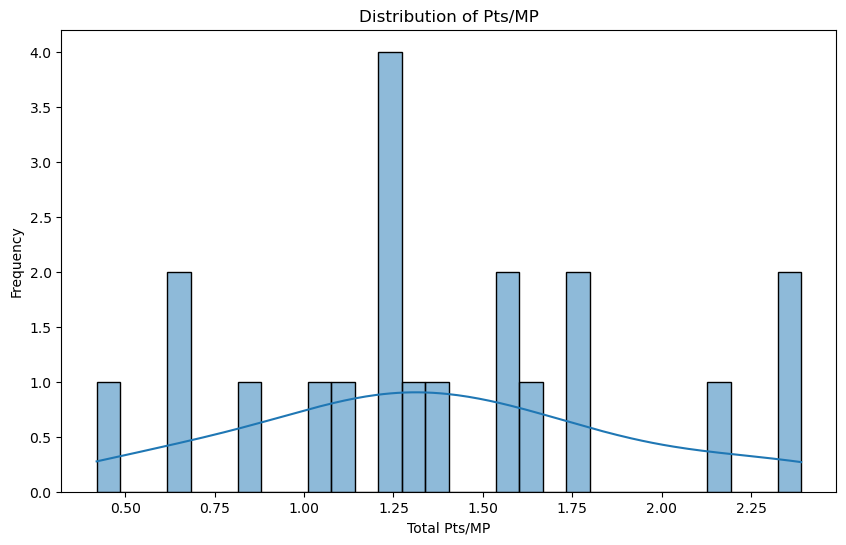

In [241]:
# distribution of 'Pts/MP'
plt.figure(figsize=(10, 6))

sns.histplot(filtered_clubs_data['Pts/MP'], kde=True, bins=30)
plt.title('Distribution of Pts/MP')
plt.xlabel('Total Pts/MP')
plt.ylabel('Frequency');

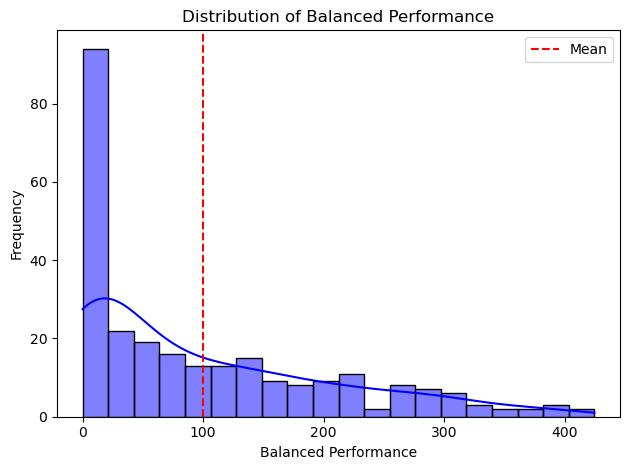

In [304]:
# distribution of 'Balanced Performance'
sns.histplot(filtered_players_data['Balanced_Performance'], kde=True, bins=20, color='blue')
plt.title('Distribution of Balanced Performance')
plt.xlabel('Balanced Performance')
plt.ylabel('Frequency')
plt.axvline(filtered_players_data['Balanced_Performance'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.tight_layout()
plt.savefig('../images/Distribution_of_Balanced_Performance.jpg')
plt.show();

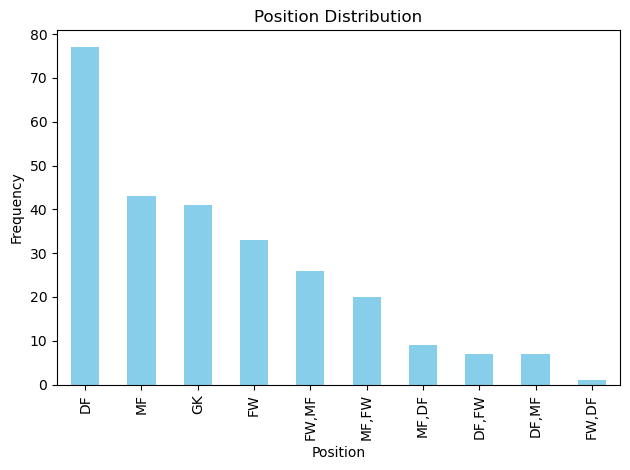

In [305]:
filtered_players_data['Pos'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Position Distribution')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../images/Position_Distribution.jpg')
plt.show();

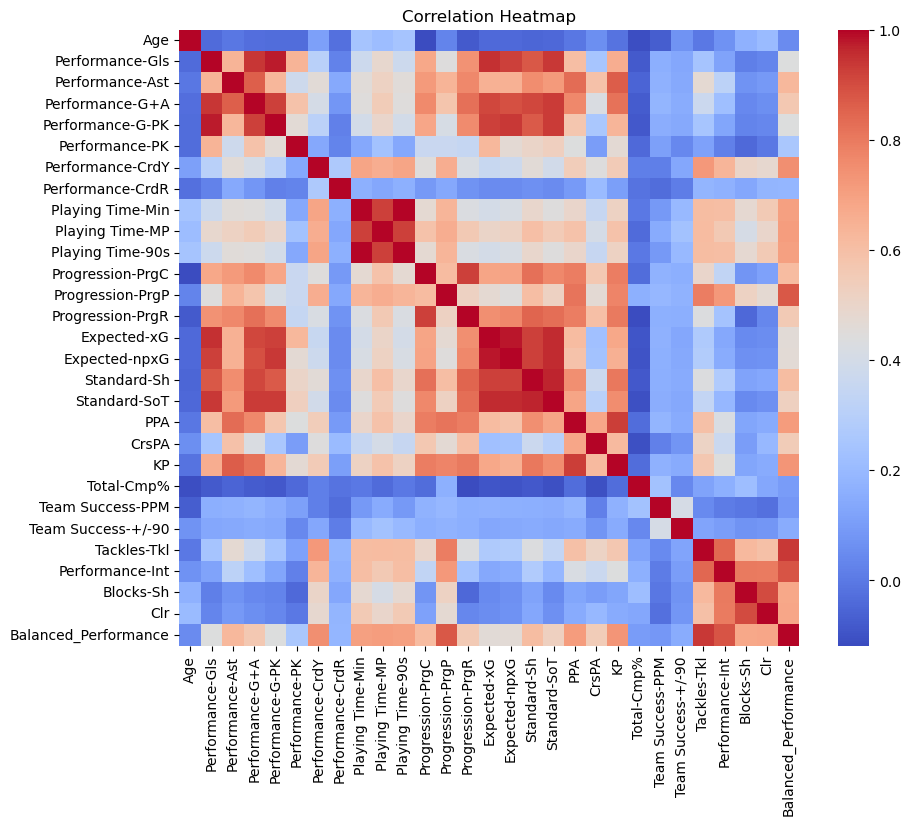

In [244]:
# Select only numeric columns for correlation
numeric_data = filtered_players_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show();

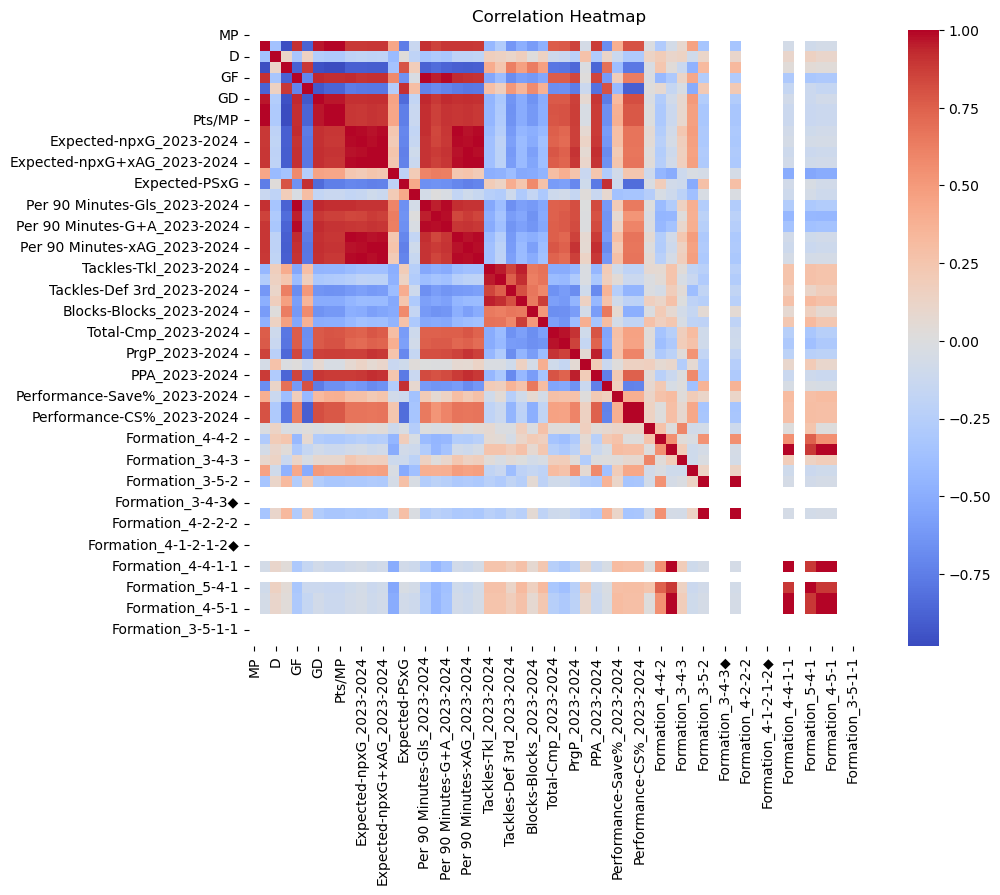

In [245]:
# Select only numeric columns for correlation
numeric_data = filtered_clubs_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show();

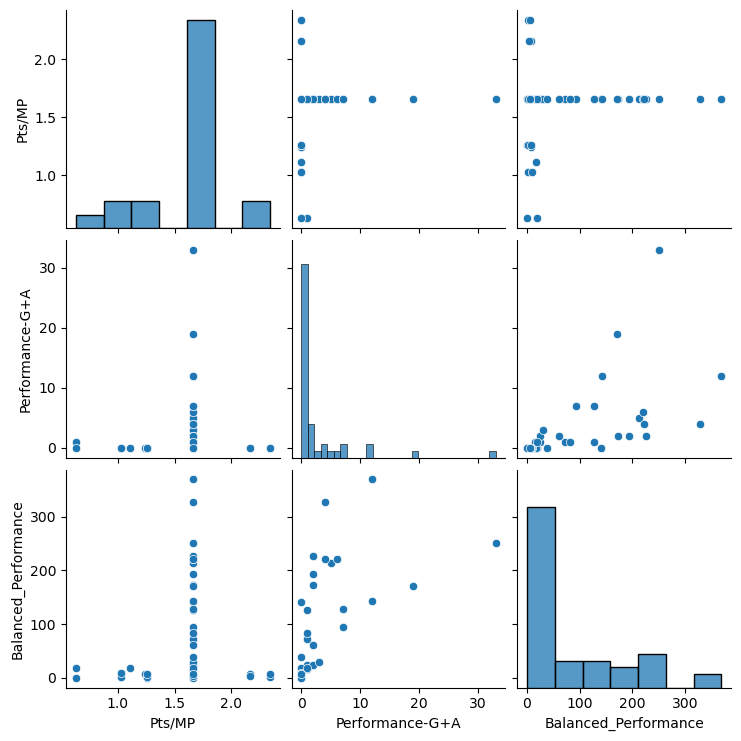

In [246]:
# Merge datasets on the common column
merged_df = pd.merge(filtered_players_data, filtered_clubs_data, left_on='Team', right_on='Squad', how='inner')

# Check if the required columns exist after merging
required_columns = ['Pts/MP', 'Performance-G+A', 'Balanced_Performance']
if all(col in merged_df.columns for col in required_columns):
    sns.pairplot(merged_df, vars=required_columns)
    plt.show()
else:
    print("Some required columns are missing in the merged dataset.")

Insight from the pairplot

* Teams with high Pts/MP do well because of a balanced team effort, not just because of star attackers.
* Balanced_Performance shows how both offensive and defensive players contribute to the team, which is why it connects better with Pts/MP.
* Players with very high Performance-G+A or Balanced_Performance might be key players who have a big impact on their team's success.

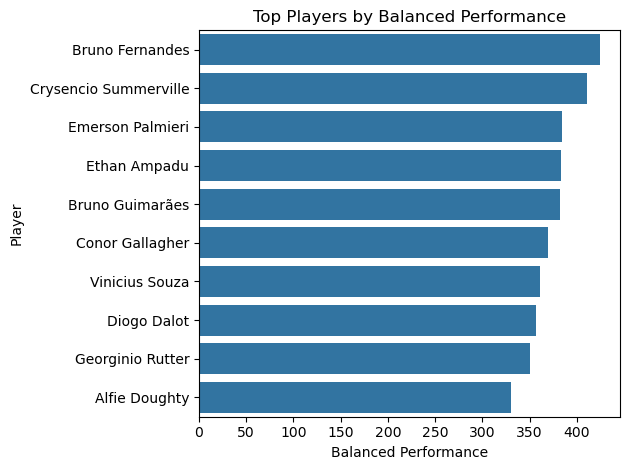

In [279]:
top_players = filtered_players_data[['Player', 'Balanced_Performance']].sort_values(by='Balanced_Performance', ascending=False).head(10)

sns.barplot(x='Balanced_Performance', y='Player', data=top_players)
plt.title('Top Players by Balanced Performance')
plt.xlabel('Balanced Performance')
plt.ylabel('Player')
plt.tight_layout()
plt.savefig('../images/Top_Players_by_Balanced_Performance.jpg')
plt.show();

This chart shows the top players based on their Balanced_Performance. Bruno Fernandes leads with the highest score, followed by Crysencio Summerville and Emerson Palmieri. These players excel in both offensive and defensive contributions.

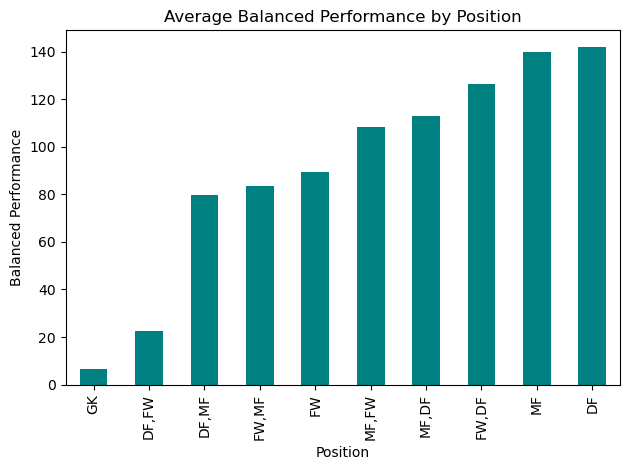

In [280]:
position_performance = filtered_players_data.groupby('Pos')['Balanced_Performance'].mean().sort_values()
position_performance.plot(kind='bar', color='teal')
plt.title('Average Balanced Performance by Position')
plt.xlabel('Position')
plt.ylabel('Balanced Performance')
plt.tight_layout()
plt.savefig('../images/Average_Balanced_Performance_by_Position.jpg')
plt.show();

This chart shows average Balanced_Performance by position. Midfielders with defensive roles (MF, DF) have the highest scores, indicating their strong overall contributions, while goalkeepers (GK) have the lowest scores, reflecting their specialized role.

<Axes: ylabel='Squad'>

Text(0.5, 1.0, 'Formation Usage by Club')

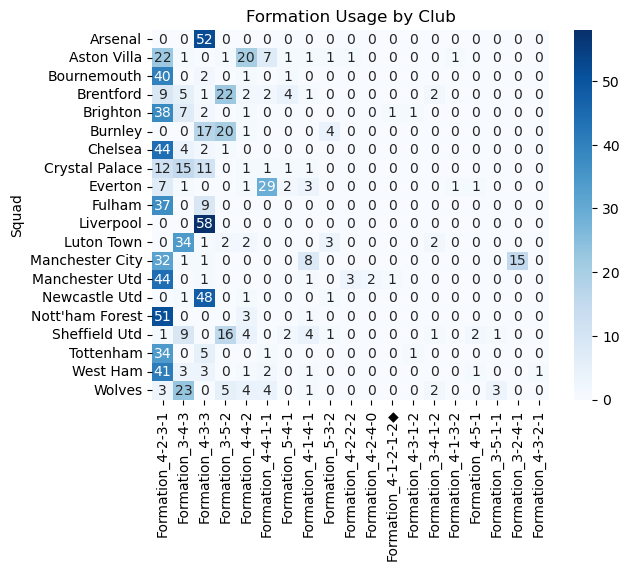

In [297]:
# Check and select formation columns
formation_columns = [col for col in filtered_clubs_data.columns if 'Formation_' in col]

# Ensure there are formation columns before proceeding
if formation_columns:
    formation_counts = filtered_clubs_data[['Squad'] + formation_columns].set_index('Squad')

    # Create the heatmap only if the DataFrame is not empty
    if not formation_counts.empty:
        sns.heatmap(formation_counts, cmap='Blues', annot=True)
        plt.title('Formation Usage by Club')
        plt.show();

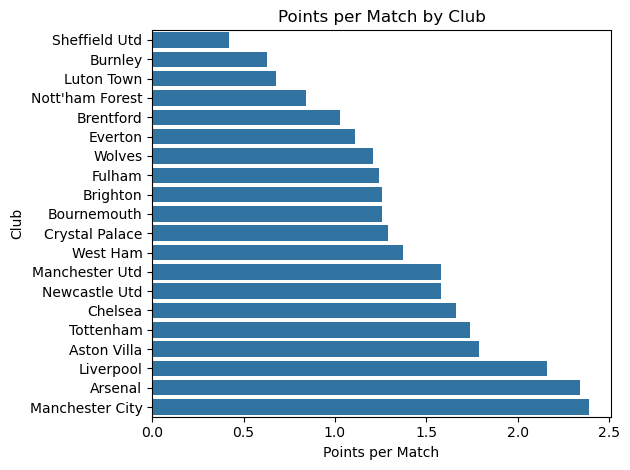

In [306]:
sns.barplot(x='Pts/MP', y='Squad', data=filtered_clubs_data.sort_values(by='Pts/MP'))
plt.title('Points per Match by Club')
plt.xlabel('Points per Match')
plt.ylabel('Club')
plt.tight_layout()
plt.savefig('../images/Points_per_Match_by_Club.jpg')
plt.show();

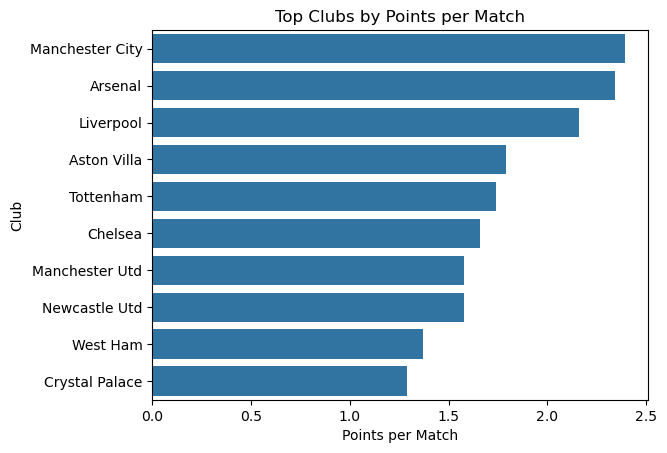

In [303]:
top_clubs = filtered_clubs_data[['Squad', 'Pts/MP', 'Expected-xAG_2023-2024']].sort_values(by='Pts/MP', ascending=False).head(10)
sns.barplot(x='Pts/MP', y='Squad', data=top_clubs)
plt.title('Top Clubs by Points per Match')
plt.xlabel('Points per Match')
plt.ylabel('Club')
plt.show();